In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline

In [2]:
plt.rc('figure',dpi=150);

In [3]:
postulantes = pd.read_csv('../data/datos_navent_fiuba/fiuba_2_postulantes_genero_y_edad.csv')

In [4]:
postulantes.head()

,idpostulante,fechanacimiento,sexo
0,NM5M,1970-12-03,FEM
1,5awk,1962-12-04,FEM
2,ZaO5,1978-08-10,FEM
3,NdJl,1969-05-09,MASC
4,eo2p,1981-02-16,MASC


In [5]:
postulantes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200888 entries, 0 to 200887
Data columns (total 3 columns):
idpostulante       200888 non-null object
fechanacimiento    196138 non-null object
sexo               200888 non-null object
dtypes: object(3)
memory usage: 4.6+ MB


In [6]:
postulaciones = pd.read_csv('../data/datos_navent_fiuba/fiuba_4_postulaciones.csv')

In [7]:
postulaciones.head()

,idaviso,idpostulante,fechapostulacion
0,1112257047,NM5M,2018-01-15 16:22:34
1,1111920714,NM5M,2018-02-06 09:04:50
2,1112346945,NM5M,2018-02-22 09:04:47
3,1112345547,NM5M,2018-02-22 09:04:59
4,1112237522,5awk,2018-01-25 18:55:03


In [8]:
postulaciones_y_postulantes = pd.merge(postulantes, postulaciones, on='idpostulante', how='inner')

In [9]:
postulaciones_y_postulantes.head()

,idpostulante,fechanacimiento,sexo,idaviso,fechapostulacion
0,NM5M,1970-12-03,FEM,1112257047,2018-01-15 16:22:34
1,NM5M,1970-12-03,FEM,1111920714,2018-02-06 09:04:50
2,NM5M,1970-12-03,FEM,1112346945,2018-02-22 09:04:47
3,NM5M,1970-12-03,FEM,1112345547,2018-02-22 09:04:59
4,5awk,1962-12-04,FEM,1112237522,2018-01-25 18:55:03


In [10]:
#me quedo solo con lo que me interesa
postulaciones_y_postulantes = postulaciones_y_postulantes[['fechanacimiento','sexo']]

In [11]:
#postulaciones_y_postulantes = postulaciones_y_postulantes['fechanacimiento'].str.split(' ', 1, expand=True)
postulaciones_y_postulantes['fechanacimiento'] = pd.to_datetime(postulaciones_y_postulantes['fechanacimiento'], errors = 'coerce')
postulaciones_y_postulantes.head()

,fechanacimiento,sexo
0,1970-12-03,FEM
1,1970-12-03,FEM
2,1970-12-03,FEM
3,1970-12-03,FEM
4,1962-12-04,FEM


In [12]:
#postulaciones_y_postulantes['year'] = postulaciones_y_postulantes['fechanacimiento'].dt.year
#postulaciones_y_postulantes.head()
now = datetime.now()

In [13]:
postulaciones_y_postulantes['edad'] = now - postulaciones_y_postulantes['fechanacimiento']

In [14]:
postulaciones_y_postulantes.head()

,fechanacimiento,sexo,edad
0,1970-12-03,FEM,17301 days 00:22:26.893483
1,1970-12-03,FEM,17301 days 00:22:26.893483
2,1970-12-03,FEM,17301 days 00:22:26.893483
3,1970-12-03,FEM,17301 days 00:22:26.893483
4,1962-12-04,FEM,20222 days 00:22:26.893483


In [15]:
postulaciones_y_postulantes['dias'], postulaciones_y_postulantes['trash'] = postulaciones_y_postulantes['edad'].astype(str).str.split(' ', 1).str


In [16]:
postulaciones_y_postulantes = postulaciones_y_postulantes.drop(['fechanacimiento','trash'], axis=1)
postulaciones_y_postulantes.head()

,sexo,edad,dias
0,FEM,17301 days 00:22:26.893483,17301
1,FEM,17301 days 00:22:26.893483,17301
2,FEM,17301 days 00:22:26.893483,17301
3,FEM,17301 days 00:22:26.893483,17301
4,FEM,20222 days 00:22:26.893483,20222


In [17]:
#limpio datos feos
postulaciones_y_postulantes = postulaciones_y_postulantes[postulaciones_y_postulantes['dias'] != 'NaT']

In [18]:
postulaciones_y_postulantes = postulaciones_y_postulantes.drop(['edad'], axis=1)
postulaciones_y_postulantes.head()

,sexo,dias
0,FEM,17301
1,FEM,17301
2,FEM,17301
3,FEM,17301
4,FEM,20222


In [19]:
postulaciones_y_postulantes['anios'] = postulaciones_y_postulantes['dias'].apply(lambda x: float(x)/365)
postulaciones_y_postulantes['anios'] = postulaciones_y_postulantes['anios'].astype(int)

In [20]:
postulaciones_y_postulantes['anios'].value_counts()

24     230083
26     226583
25     224389
27     218737
23     214751
22     199926
28     184205
21     180342
29     174241
30     149017
31     138705
20     134319
32     123330
33     102662
19      93800
34      87161
35      79985
36      70509
37      61972
38      57085
39      49363
40      45443
18      40550
41      37884
42      29662
43      28307
44      22268
45      19946
46      19112
47      16974
        ...  
53       7487
52       7260
54       6209
55       5615
56       5192
57       5053
58       3984
59       2651
60       1712
61       1443
17       1339
62       1028
64        705
63        558
67        243
65        129
66        115
68         99
70         80
69         58
100        27
242        20
73         20
76         14
75         12
96          6
12          6
71          5
74          3
78          1
Name: anios, Length: 64, dtype: int64

In [21]:
#hay solo tres edades mayores a los 80 años, con muy pocos valores, los filtro.
#de hecho, una vez visto el histograma, post 70 anios no hay practicamente nada.
postulaciones_y_postulantes = postulaciones_y_postulantes[postulaciones_y_postulantes['anios'] < 70]
postulaciones_y_postulantes = postulaciones_y_postulantes[postulaciones_y_postulantes['anios'] > 18]

In [22]:
postulaciones_y_postulantes['anios'].value_counts()

24    230083
26    226583
25    224389
27    218737
23    214751
22    199926
28    184205
21    180342
29    174241
30    149017
31    138705
20    134319
32    123330
33    102662
19     93800
34     87161
35     79985
36     70509
37     61972
38     57085
39     49363
40     45443
41     37884
42     29662
43     28307
44     22268
45     19946
46     19112
47     16974
48     13941
49     11108
50     10390
51      9297
53      7487
52      7260
54      6209
55      5615
56      5192
57      5053
58      3984
59      2651
60      1712
61      1443
62      1028
64       705
63       558
67       243
65       129
66       115
68        99
69        58
Name: anios, dtype: int64

Text(0,0.5,'Cantidad de postulaciones')

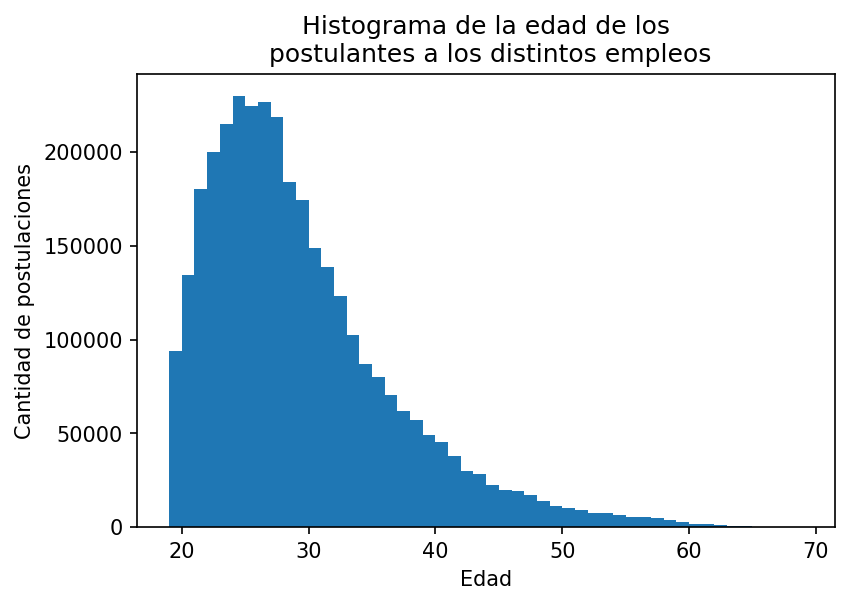

In [23]:
#utilizado
#revisar los bins. Preguntar si esta bien que queden espacios en blancos.
histo_edades = postulaciones_y_postulantes['anios'].plot.hist(bins=50)
histo_edades.set_title("Histograma de la edad de los\n postulantes a los distintos empleos", fontsize = 12)
histo_edades.set_xlabel("Edad", fontsize = 10 )
histo_edades.set_ylabel("Cantidad de postulaciones", fontsize = 10)

Text(0.5,0,'Edad')

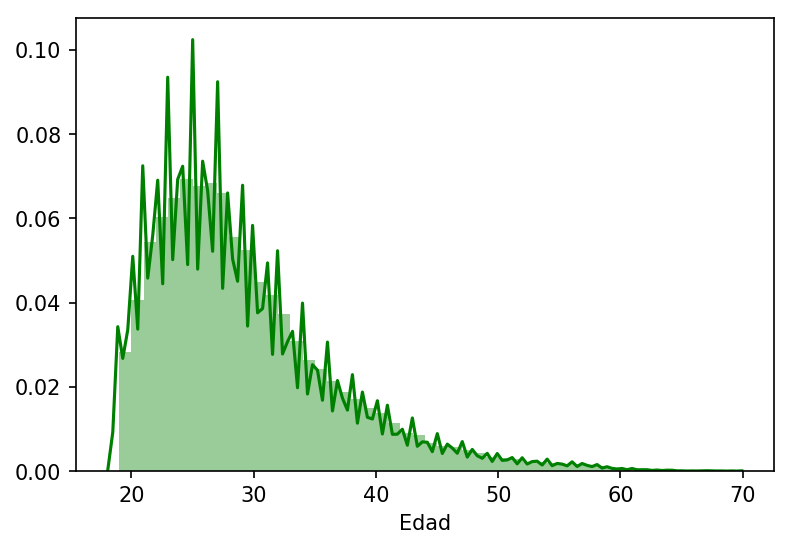

In [24]:
#grafico densidad para compararlos
fig, ax = plt.subplots()
densidad_edad = sns.distplot(postulaciones_y_postulantes['anios'], color = 'green')
densidad_edad.set_xlabel("Edad", fontsize = 10 )

In [25]:
#ahora voy a comparar por los distintos generos. Saco un df p c genero.
postulantes_hombres = postulaciones_y_postulantes[postulaciones_y_postulantes['sexo'] == 'MASC']
postulantes_hombres['anios'].value_counts()

27    107078
26    106783
24    103354
25    101661
23     95636
28     94816
29     88157
22     87121
30     76560
21     75579
31     73367
32     69157
20     57081
33     56838
34     49493
35     46686
36     39444
19     38798
37     35894
38     32446
39     26966
40     25996
41     21121
42     17329
43     16826
44     13005
46     12178
45     10962
47      9630
48      8116
50      6508
49      6185
51      5893
52      4381
53      4323
54      3888
57      3726
55      3071
56      2892
58      2828
59      1946
60      1398
61      1142
62       890
63       474
64       427
67       225
65       111
66       102
68        87
69        11
Name: anios, dtype: int64

Text(0,0.5,'Cantidad de postulaciones')

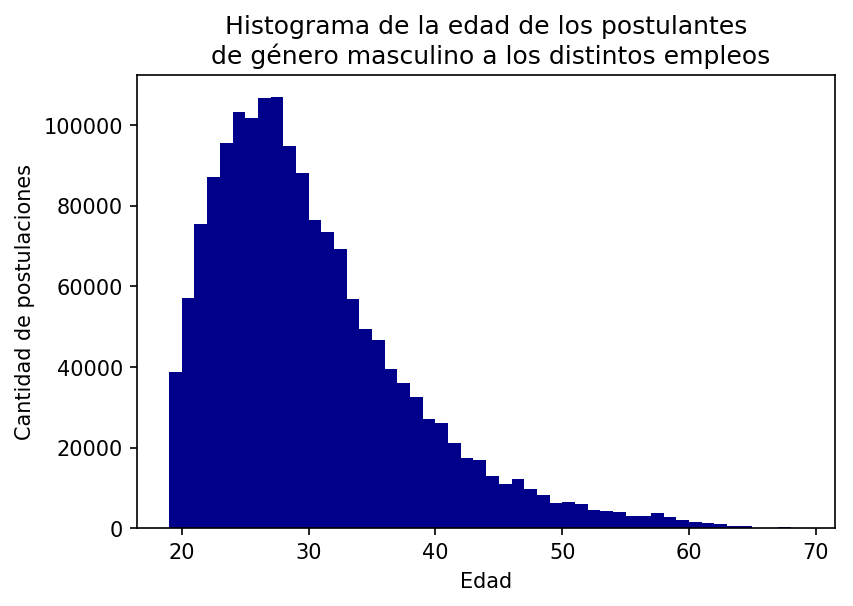

In [60]:
histo_edades_hombres = postulantes_hombres['anios'].plot.hist(bins=50, color='darkblue')
histo_edades_hombres.set_title("Histograma de la edad de los postulantes\n de género masculino a los distintos empleos", fontsize = 12)
histo_edades_hombres.set_xlabel("Edad", fontsize = 10);
histo_edades_hombres.set_ylabel("Cantidad de postulaciones", fontsize = 10)
#notemos que es bastante similar al general.

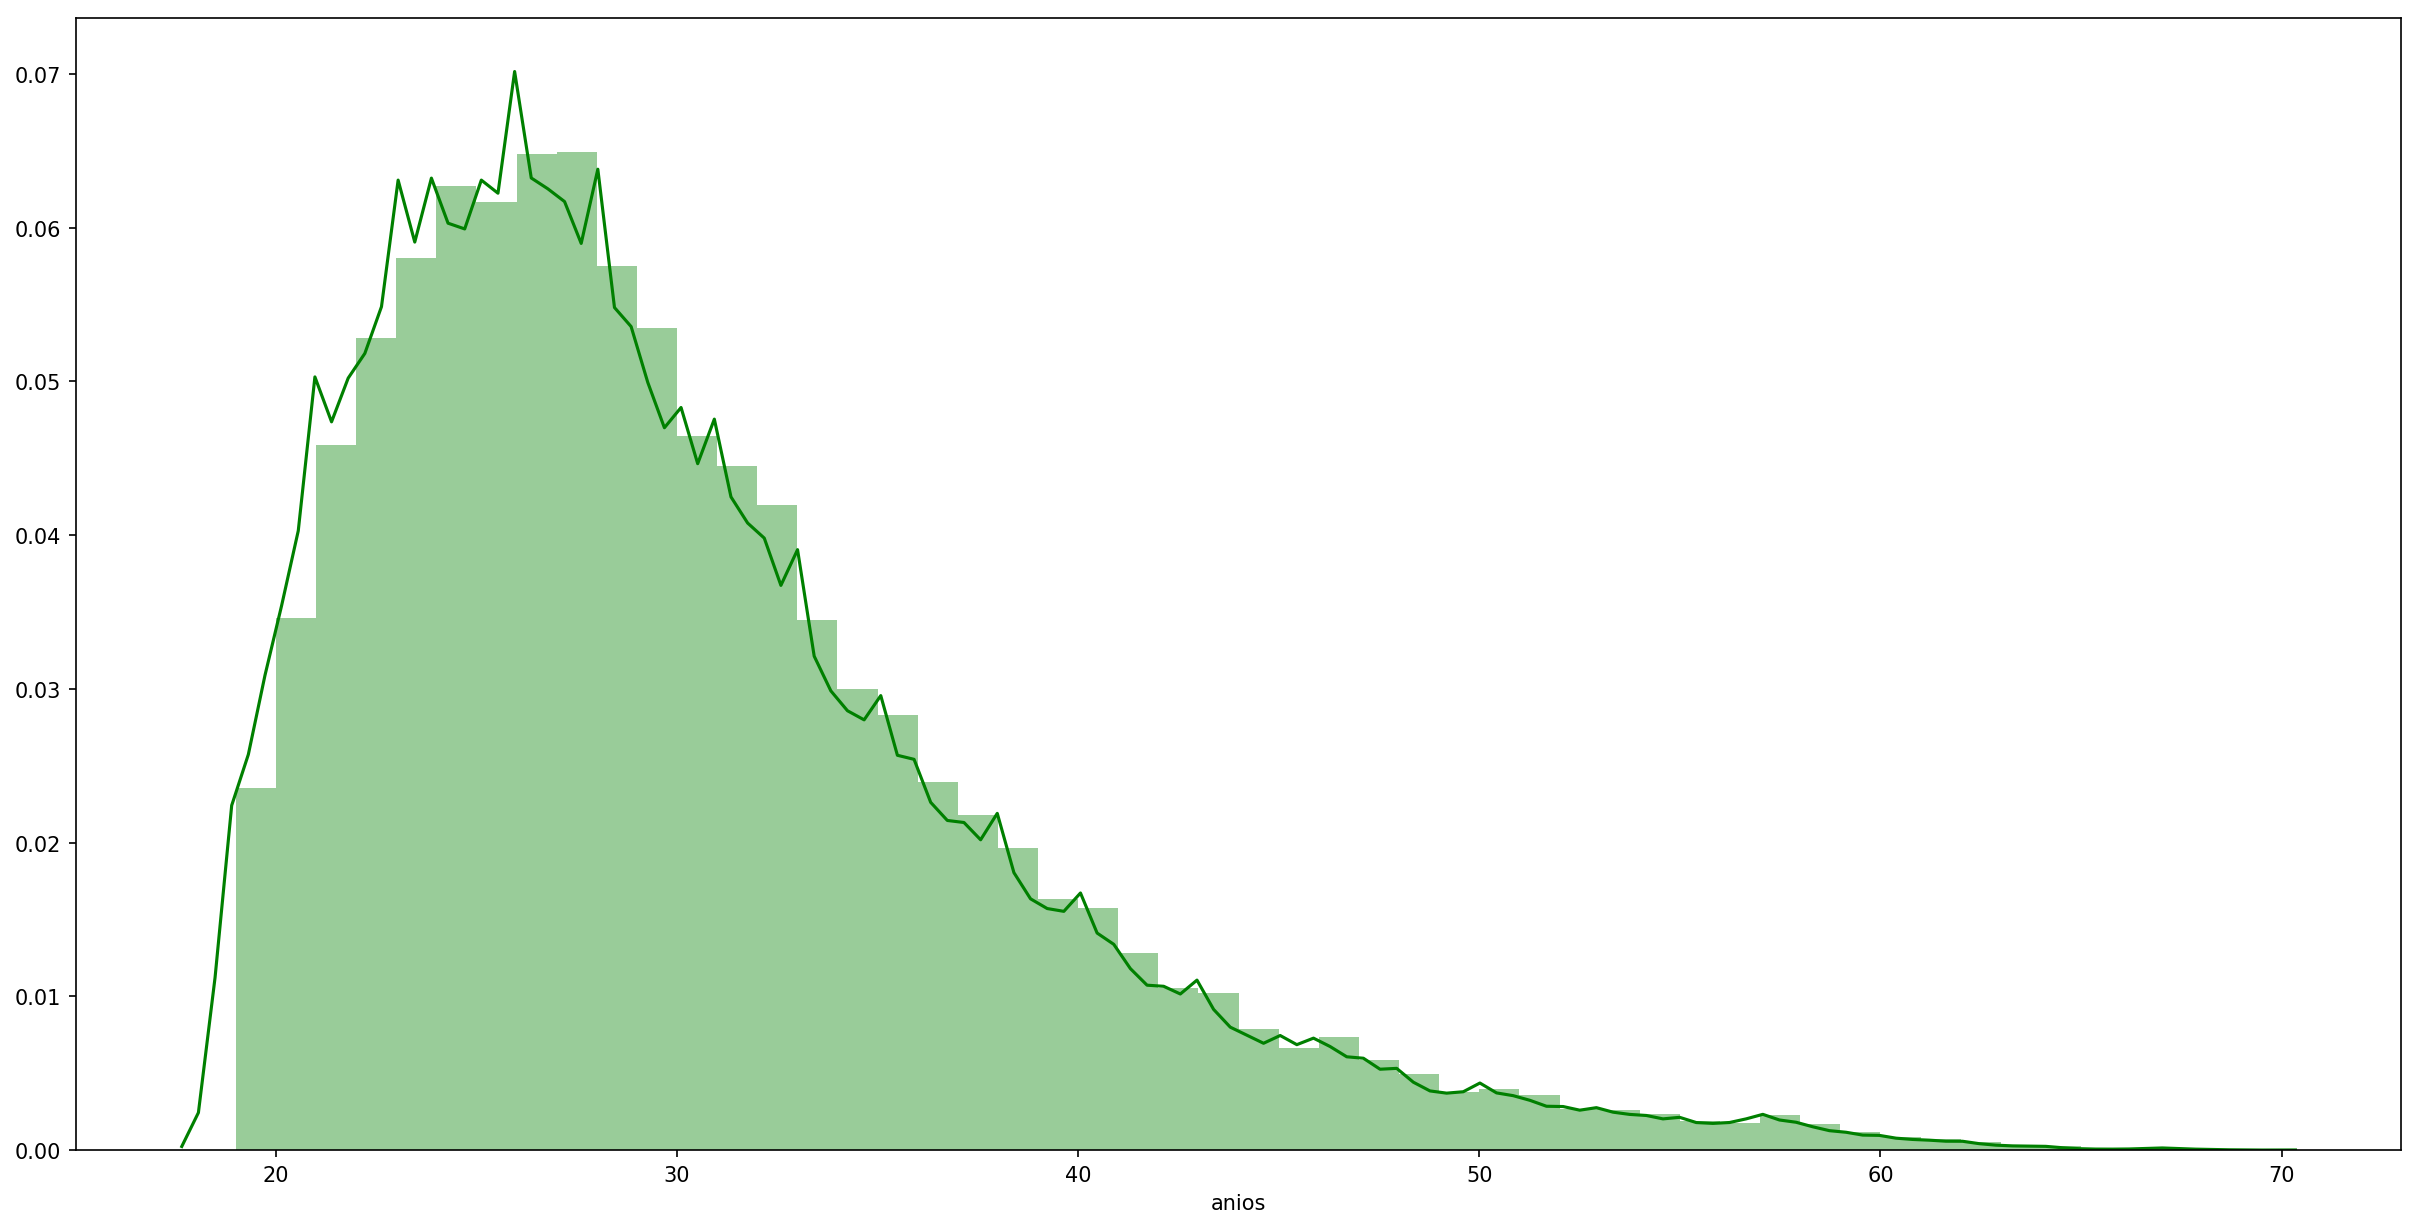

In [27]:
dims = (20, 10)
fig, ax = plt.subplots(figsize=dims)
densidad_hombres = sns.distplot(postulantes_hombres['anios'], color = 'green')

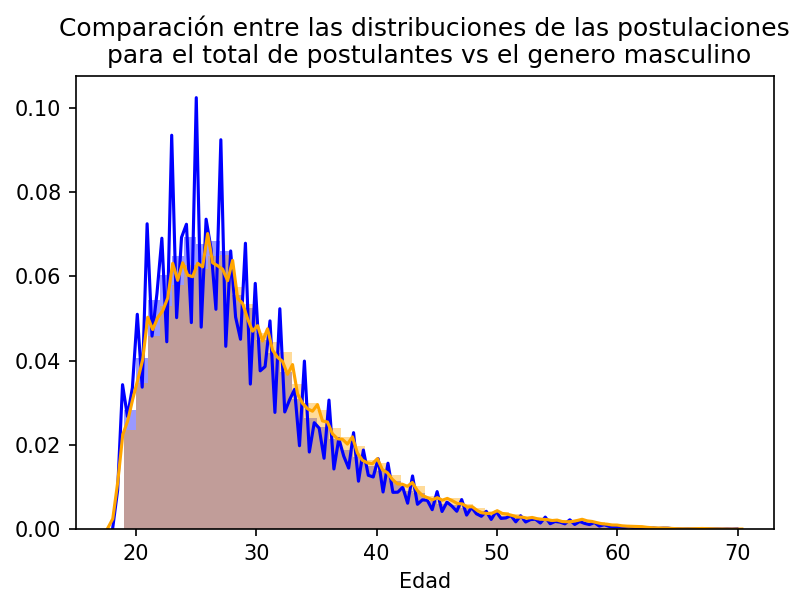

In [28]:
#comparo densidad genero masculino con histo general. (no puedo comparar histo porque tienen distinta cantidad de elementos, preguntar)
fig, ax = plt.subplots()
densidad_comp_h_g = sns.distplot(postulaciones_y_postulantes['anios'], color='blue')
densidad_comp_h_g = sns.distplot(postulantes_hombres['anios'], color='orange')
densidad_comp_h_g.set_title("Comparación entre las distribuciones de las postulaciones\n para el total de postulantes vs el genero masculino", fontsize=12)
densidad_comp_h_g.set_xlabel("Edad", fontsize = 10);

In [29]:
postulantes_mujeres = postulaciones_y_postulantes[postulaciones_y_postulantes['sexo'] == 'FEM']
postulantes_mujeres['anios'].value_counts()

24    126429
25    122356
26    119539
23    118727
22    112614
27    111546
21    104428
28     88912
29     85957
20     76992
30     72300
31     65134
32     54055
19     53784
33     45650
34     37569
35     33181
36     30841
37     26017
38     24602
39     22344
40     19360
41     16750
42     12286
43     11431
44      9255
45      8959
47      7320
46      6901
48      5794
49      4816
50      3873
51      3390
53      3146
52      2864
55      2513
54      2321
56      2222
57      1319
58      1134
59       702
60       312
61       299
62       138
64        93
63        84
69        47
65        18
67        18
66         9
68         3
Name: anios, dtype: int64

Text(0,0.5,'Cantidad de postulaciones')

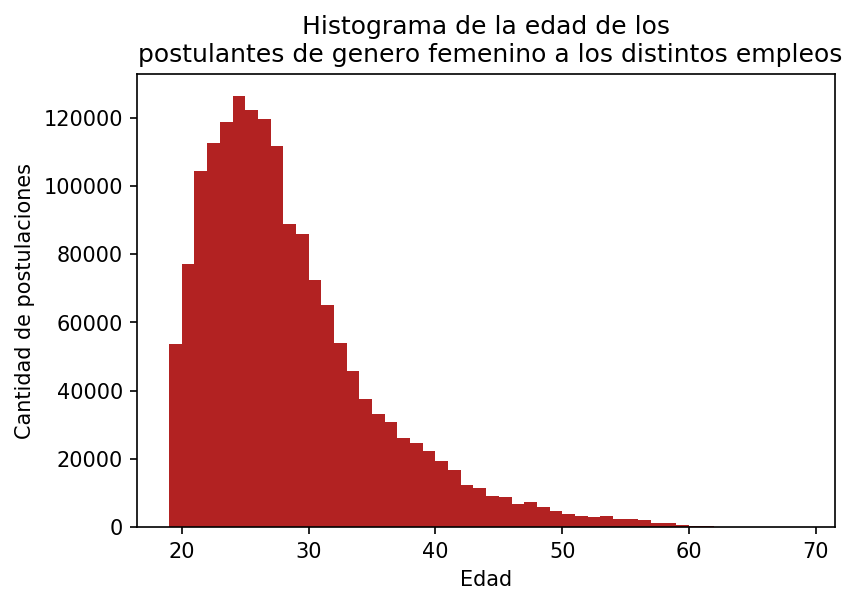

In [30]:
#usado.
histo_edades_mujeres = postulantes_mujeres['anios'].plot.hist(bins=50, color='firebrick')
histo_edades_mujeres.set_title("Histograma de la edad de los\n postulantes de genero femenino a los distintos empleos", fontsize = 12)
histo_edades_mujeres.set_xlabel("Edad", fontsize = 10 )
histo_edades_mujeres.set_ylabel("Cantidad de postulaciones", fontsize = 10)

Text(0.5,0,'Edad')

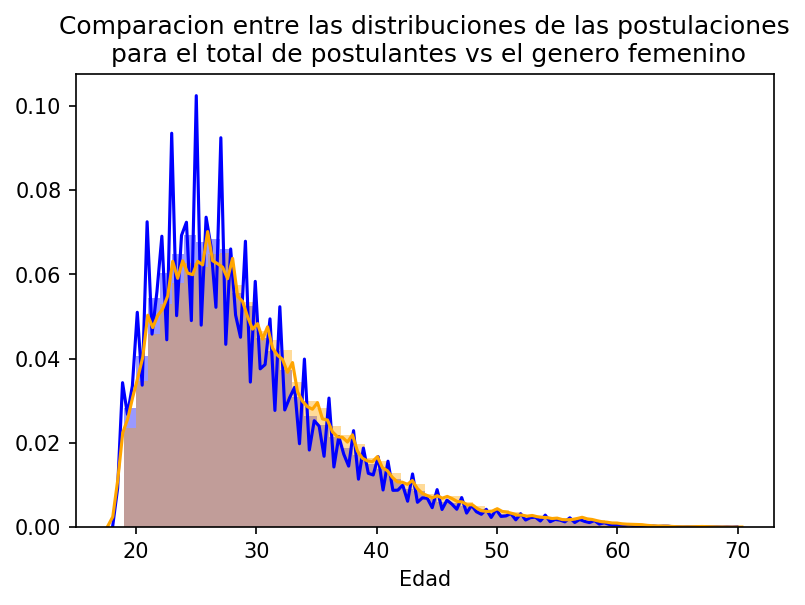

In [31]:
fig, ax = plt.subplots()
densidad_comp_m_g = sns.distplot(postulaciones_y_postulantes['anios'], color='blue', label='general')
densidad_comp_m_g = sns.distplot(postulantes_hombres['anios'], color='orange', label='masculino')
densidad_comp_m_g.set_title("Comparacion entre las distribuciones de las postulaciones\n para el total de postulantes vs el genero femenino",fontsize=12)
densidad_comp_m_g.set_xlabel("Edad", fontsize = 10 )

Text(0.5,0,'Edad')

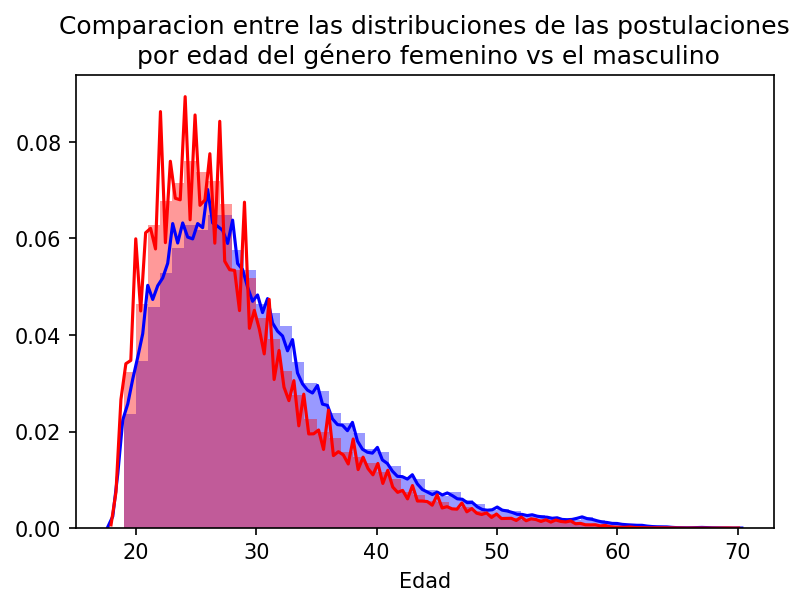

In [32]:
#usado
#finalmente comparo distribucion de hombres vs mujeres.
fig, ax = plt.subplots()
densidad_comp_h_m = sns.distplot(postulantes_hombres['anios'], color='blue', label='masculino')
densidad_comp_h_m = sns.distplot(postulantes_mujeres['anios'], color='red', label='femenino')
densidad_comp_h_m.set_title("Comparacion entre las distribuciones de las postulaciones\n por edad del género femenino vs el masculino", fontsize = 12)
densidad_comp_h_m.set_xlabel("Edad", fontsize=10)

In [33]:
#pasamos a un analisis distinto. Vamos a comparar popularidad en la demanda de distintas areas relacionandolo viendo 
#que edad son mas comunes. #nos quedamos con las 5 areas mas populares y vemos el rango de edades en las que se dan.ç
postulaciones_y_postulantes = pd.merge(postulantes, postulaciones, on='idpostulante', how='inner')
avisos = pd.read_csv('../data/datos_navent_fiuba/fiuba_6_avisos_detalle.csv')
postulaciones_avisos = pd.merge(postulaciones_y_postulantes, avisos, on='idaviso', how='inner')

In [34]:
postulaciones_avisos.head()

,idpostulante,fechanacimiento,sexo,idaviso,fechapostulacion,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,NM5M,1970-12-03,FEM,1112257047,2018-01-15 16:22:34,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
1,8krKL,1972-11-06,MASC,1112257047,2018-01-21 09:45:13,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
2,EDEpY4,1980-05-22,FEM,1112257047,2018-01-15 09:07:25,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
3,1lejrO,1968-05-05,FEM,1112257047,2018-01-16 06:01:50,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA
4,Y0MNYJ,1977-02-28,FEM,1112257047,2018-01-16 16:22:36,1,REPRESENTANTES DE ATENCIÓN AL CLIENTE/ RETENCIÓN,"<p><strong><em><span style="""">En </span></em><...",Gran Buenos Aires,NaN,NaN,Part-time,Otro,Atención al Cliente,Eficasia Argentina SA


In [35]:
#vemos las 5 areas mas populares.
postulaciones_avisos['nombre_area'].value_counts()

Ventas                                   408148
Administración                           291135
Producción                               277089
Comercial                                216677
Atención al Cliente                      195636
Recepcionista                            137485
Call Center                              126430
Telemarketing                             87506
Tesorería                                 78450
Mantenimiento y Limpieza                  63308
Contabilidad                              55563
Almacén / Depósito / Expedición           53261
Gastronomia                               51213
Recursos Humanos                          45668
Secretaria                                39188
Logística                                 37139
Administración de Personal                37011
Créditos y Cobranzas                      36690
Marketing                                 29861
Legal                                     29295
Farmacéutica                            

In [36]:
#me deshago de las columnas que no necesito.
postulaciones_avisos = postulaciones_avisos.drop(['titulo','nombre_zona','ciudad','mapacalle','nivel_laboral'\
            ,'denominacion_empresa','idpais','fechapostulacion', 'descripcion','sexo'], axis=1)

In [37]:
postulaciones_avisos.head()

,idpostulante,fechanacimiento,idaviso,tipo_de_trabajo,nombre_area
0,NM5M,1970-12-03,1112257047,Part-time,Atención al Cliente
1,8krKL,1972-11-06,1112257047,Part-time,Atención al Cliente
2,EDEpY4,1980-05-22,1112257047,Part-time,Atención al Cliente
3,1lejrO,1968-05-05,1112257047,Part-time,Atención al Cliente
4,Y0MNYJ,1977-02-28,1112257047,Part-time,Atención al Cliente


In [38]:
postulaciones_avisos['fechanacimiento'] = pd.to_datetime(postulaciones_avisos['fechanacimiento'], errors = 'coerce')
now = datetime.now()
postulaciones_avisos['edad'] = now - postulaciones_avisos['fechanacimiento']
postulaciones_avisos['dias'], postulaciones_avisos['trash'] = postulaciones_avisos['edad'].astype(str).str.split(' ', 1).str
postulaciones_avisos = postulaciones_avisos.drop(['trash','fechanacimiento'], axis=1)
postulaciones_avisos.head()


,idpostulante,idaviso,tipo_de_trabajo,nombre_area,edad,dias
0,NM5M,1112257047,Part-time,Atención al Cliente,17301 days 00:23:00.297609,17301
1,8krKL,1112257047,Part-time,Atención al Cliente,16597 days 00:23:00.297609,16597
2,EDEpY4,1112257047,Part-time,Atención al Cliente,13843 days 00:23:00.297609,13843
3,1lejrO,1112257047,Part-time,Atención al Cliente,18243 days 00:23:00.297609,18243
4,Y0MNYJ,1112257047,Part-time,Atención al Cliente,15022 days 00:23:00.297609,15022


In [39]:
postulaciones_avisos.dtypes

idpostulante                object
idaviso                      int64
tipo_de_trabajo             object
nombre_area                 object
edad               timedelta64[ns]
dias                        object
dtype: object

In [40]:
postulaciones_avisos = postulaciones_avisos[postulaciones_avisos['dias'] != 'NaT']
postulaciones_avisos['anios'] = postulaciones_avisos['dias'].apply(lambda x: float(x)/365)
postulaciones_avisos['anios'] = postulaciones_avisos['anios'].astype(int)
postulaciones_avisos = postulaciones_avisos.drop(['edad', 'dias'], axis=1)
postulaciones_avisos = postulaciones_avisos[postulaciones_avisos['anios'] < 65]
postulaciones_avisos = postulaciones_avisos[postulaciones_avisos['anios'] > 18]

In [41]:
postulaciones_avisos.head()

,idpostulante,idaviso,tipo_de_trabajo,nombre_area,anios
0,NM5M,1112257047,Part-time,Atención al Cliente,47
1,8krKL,1112257047,Part-time,Atención al Cliente,45
2,EDEpY4,1112257047,Part-time,Atención al Cliente,37
3,1lejrO,1112257047,Part-time,Atención al Cliente,49
4,Y0MNYJ,1112257047,Part-time,Atención al Cliente,41


In [42]:
postulaciones_avisos_filt = postulaciones_avisos[postulaciones_avisos['nombre_area'].str.contains("Ventas|Administración|Producción|Comercial|Atención al Cliente")]
#keys = ['Atención al Cliente','Producción','Administración','Comercial', 'Ventas']

In [43]:
postulaciones_avisos_filt['nombre_area'].value_counts()

Ventas                                393037
Administración                        286886
Producción                            270260
Comercial                             211546
Atención al Cliente                   190195
Administración de Personal             36247
Ventas Internacionales/Exportación      6835
Ingeniería de Ventas                     958
Administración de Base de Datos          507
Name: nombre_area, dtype: int64

In [44]:
#filtro los que me quedaron molestando
postulaciones_avisos_filt = postulaciones_avisos_filt[postulaciones_avisos['nombre_area'] != 'Administración de Personal']
postulaciones_avisos_filt = postulaciones_avisos_filt[postulaciones_avisos['nombre_area'] != 'Ingeniería de Ventas']
postulaciones_avisos_filt = postulaciones_avisos_filt[postulaciones_avisos['nombre_area'] != 'Administración de Base de Datos']
postulaciones_avisos_filt = postulaciones_avisos_filt[postulaciones_avisos['nombre_area'] != 'Ventas Internacionales/Exportación']
postulaciones_avisos_filt.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


,idpostulante,idaviso,tipo_de_trabajo,nombre_area,anios
0,NM5M,1112257047,Part-time,Atención al Cliente,47
1,8krKL,1112257047,Part-time,Atención al Cliente,45
2,EDEpY4,1112257047,Part-time,Atención al Cliente,37
3,1lejrO,1112257047,Part-time,Atención al Cliente,49
4,Y0MNYJ,1112257047,Part-time,Atención al Cliente,41


In [45]:
postulaciones_avisos_filt['nombre_area'].value_counts()

Ventas                 393037
Administración         286886
Producción             270260
Comercial              211546
Atención al Cliente    190195
Name: nombre_area, dtype: int64

(18, 50)

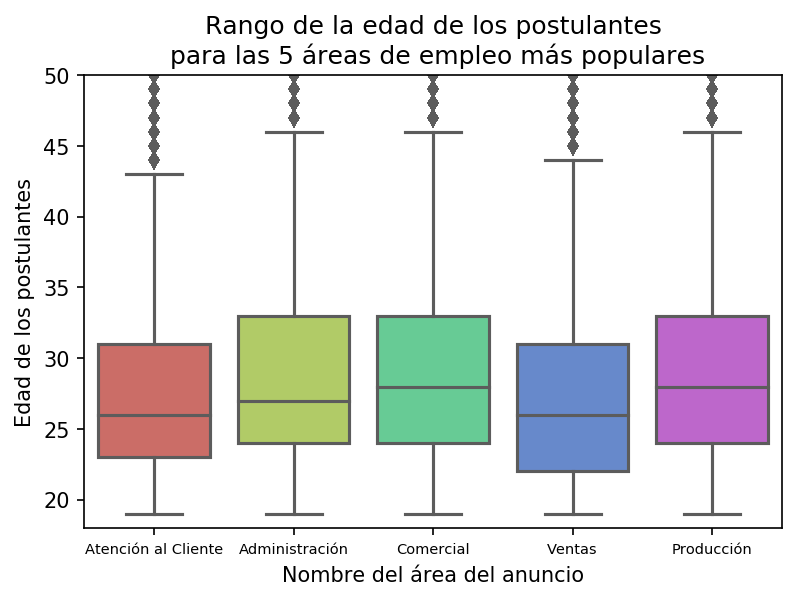

In [46]:
dims=(15,8)
fig, ax = plt.subplots()
box_edad_areas = sns.boxplot(x='nombre_area', y='anios', data=postulaciones_avisos_filt, palette='hls')
box_edad_areas.set_xlabel("Nombre del área del anuncio", fontsize = 10)
box_edad_areas.set_xticklabels(box_edad_areas.get_xticklabels(),rotation=0, fontsize=7)
box_edad_areas.set_ylabel("Edad de los postulantes", fontsize = 10)
box_edad_areas.set_title("Rango de la edad de los postulantes\n para las 5 áreas de empleo más populares", fontsize = 12)
plt.ylim(18, 50)

In [47]:
#ahora veamos los empleos mas populares determinando rangos de edades.
#defino funcion para mapear las edades.
def map(number):
    if number in range (18,25):
        return "18-24"
    if number in range(25, 35):
        return "25-34"
    if number in range(35, 50):
        return "35-49"
    if number in range(50, 66):
        return "50-65"

In [48]:
postulaciones_avisos['rango_edades'] = postulaciones_avisos['anios'].map(map)

In [49]:
postulaciones_avisos.head()

,idpostulante,idaviso,tipo_de_trabajo,nombre_area,anios,rango_edades
0,NM5M,1112257047,Part-time,Atención al Cliente,47,35-49
1,8krKL,1112257047,Part-time,Atención al Cliente,45,35-49
2,EDEpY4,1112257047,Part-time,Atención al Cliente,37,35-49
3,1lejrO,1112257047,Part-time,Atención al Cliente,49,35-49
4,Y0MNYJ,1112257047,Part-time,Atención al Cliente,41,35-49


In [50]:
#filtramos por las 5 areas mas populares en cuanto a postulaciones para cada rango de edad que definimos.
postulaciones_edad_18_a_24 = postulaciones_avisos[postulaciones_avisos['rango_edades'] == '18-24']
postulaciones_edad_18_a_24['nombre_area'].value_counts()

Ventas                                   161821
Administración                            82249
Atención al Cliente                       75247
Producción                                71839
Comercial                                 62878
Recepcionista                             56191
Call Center                               52677
Telemarketing                             41197
Tesorería                                 25879
Gastronomia                               19582
Mantenimiento y Limpieza                  19156
Almacén / Depósito / Expedición           14373
Camareros                                 12856
Secretaria                                12824
Contabilidad                              12347
Farmacéutica                              10761
Administración de Personal                10434
Cadetería                                  9194
Recursos Humanos                           9172
Créditos y Cobranzas                       8971
Soporte Técnico                         

[Text(0,0,'Ventas'),
 Text(0,0,'Administración'),
 Text(0,0,'Atención al Cliente'),
 Text(0,0,'Producción'),
 Text(0,0,'Comercial')]

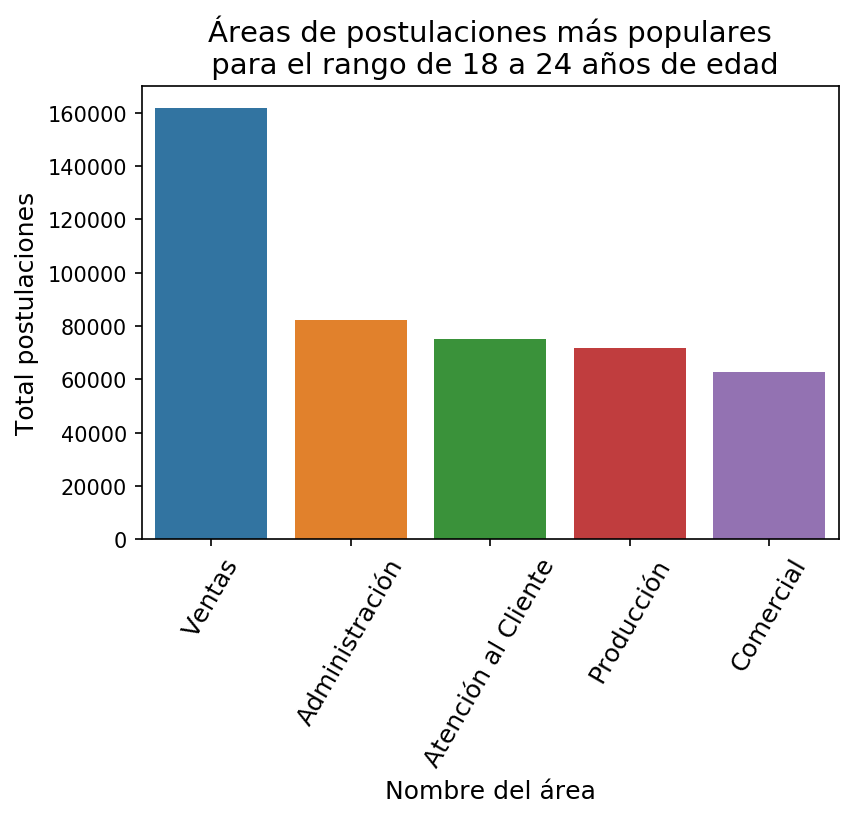

In [51]:
popus1 = sns.countplot(x='nombre_area', data=postulaciones_edad_18_a_24, order=postulaciones_edad_18_a_24['nombre_area'].value_counts().iloc[:5].index)
popus1.set_title("Áreas de postulaciones más populares\n para el rango de 18 a 24 años de edad", fontsize=14)
popus1.set_xlabel("Nombre del área", fontsize = 12)
popus1.set_ylabel("Total postulaciones", fontsize=12)
popus1.set_xticklabels(popus1.get_xticklabels(), rotation=60, fontsize=12)

In [52]:
postulaciones_edad_25_a_34 = postulaciones_avisos[postulaciones_avisos['rango_edades'] == "25-34"]
postulaciones_edad_25_a_34['nombre_area'].value_counts()

Ventas                                   172690
Administración                           149170
Producción                               147306
Comercial                                102079
Atención al Cliente                       88779
Recepcionista                             60309
Call Center                               51712
Tesorería                                 37896
Telemarketing                             32623
Contabilidad                              28504
Mantenimiento y Limpieza                  28141
Almacén / Depósito / Expedición           26084
Recursos Humanos                          23944
Gastronomia                               21790
Logística                                 18966
Administración de Personal                18797
Créditos y Cobranzas                      18280
Secretaria                                17601
Marketing                                 17237
Legal                                     17041
Soporte Técnico                         

[Text(0,0,'Ventas'),
 Text(0,0,'Administración'),
 Text(0,0,'Producción'),
 Text(0,0,'Comercial'),
 Text(0,0,'Atención al Cliente')]

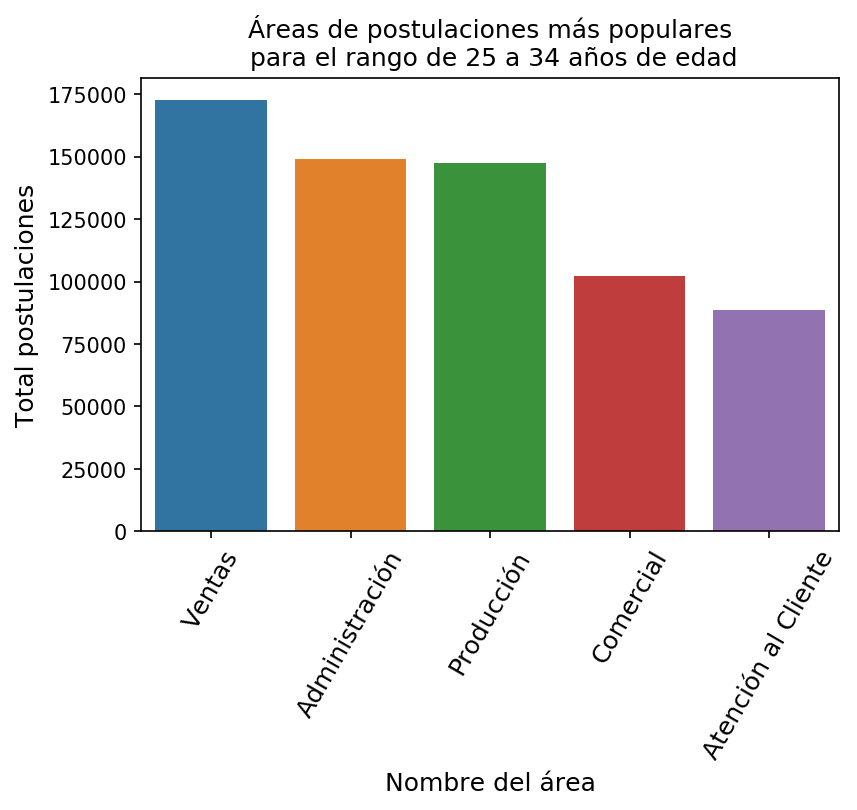

In [53]:
popus2 = sns.countplot(x='nombre_area', data=postulaciones_edad_25_a_34, order=postulaciones_edad_25_a_34['nombre_area'].value_counts().iloc[:5].index)
popus2.set_title("Áreas de postulaciones más populares\n para el rango de 25 a 34 años de edad")
popus2.set_xlabel("Nombre del área", fontsize = 12)
popus2.set_ylabel("Total postulaciones", fontsize = 12)
popus2.set_xticklabels(popus2.get_xticklabels(), rotation=60, fontsize=12)

In [54]:
postulaciones_edad_35_a_49 = postulaciones_avisos[postulaciones_avisos['rango_edades'] == "35-49"]
postulaciones_edad_35_a_49['nombre_area'].value_counts()

Ventas                                  52324
Administración                          48926
Producción                              48024
Comercial                               41108
Atención al Cliente                     24358
Recepcionista                           15779
Call Center                             15681
Mantenimiento y Limpieza                12131
Tesorería                               11712
Contabilidad                            11258
Recursos Humanos                        10377
Logística                               10367
Almacén / Depósito / Expedición         10299
Telemarketing                            8431
Créditos y Cobranzas                     7650
Mantenimiento                            7122
Gastronomia                              7112
Secretaria                               6871
Compras                                  6671
Administración de Personal               6279
Soporte Técnico                          5986
Seguridad                         

[Text(0,0,'Ventas'),
 Text(0,0,'Administración'),
 Text(0,0,'Producción'),
 Text(0,0,'Comercial'),
 Text(0,0,'Atención al Cliente')]

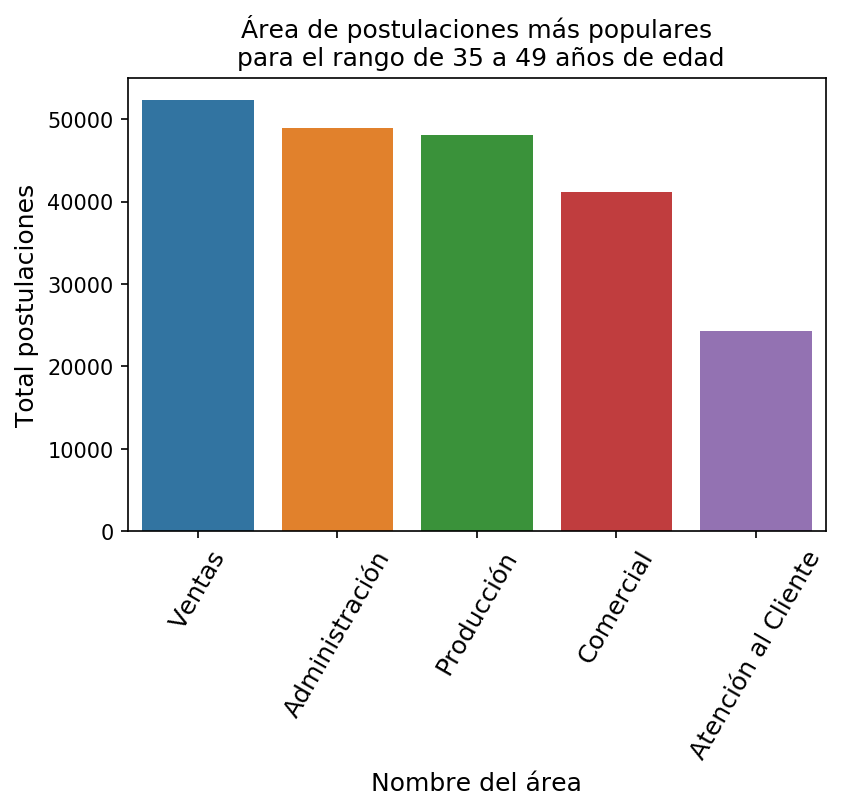

In [55]:
popus3 = sns.countplot(x='nombre_area', data=postulaciones_edad_35_a_49, order=postulaciones_edad_35_a_49['nombre_area'].value_counts().iloc[:5].index)
popus3.set_title("Área de postulaciones más populares\n para el rango de 35 a 49 años de edad")
popus3.set_xlabel("Nombre del área", fontsize = 12)
popus3.set_ylabel("Total postulaciones", fontsize = 12)
popus3.set_xticklabels(popus3.get_xticklabels(), rotation=60, fontsize=12)

In [56]:
postulaciones_edad_50_a_65 = postulaciones_avisos[postulaciones_avisos['rango_edades'] == "50-65"]
postulaciones_edad_50_a_65['nombre_area'].value_counts()

Administración                          6541
Ventas                                  6202
Comercial                               5481
Producción                              3091
Contabilidad                            2809
Recepcionista                           1881
Atención al Cliente                     1811
Call Center                             1742
Recursos Humanos                        1652
Mantenimiento y Limpieza                1410
Logística                               1409
Créditos y Cobranzas                    1247
Compras                                 1211
Secretaria                              1145
Mantenimiento                           1117
Telemarketing                           1054
Tesorería                               1035
Almacén / Depósito / Expedición          900
Finanzas                                 871
Seguridad                                763
Construcción                             744
Administración de Personal               737
Gerencia /

[Text(0,0,'Administración'),
 Text(0,0,'Ventas'),
 Text(0,0,'Comercial'),
 Text(0,0,'Producción'),
 Text(0,0,'Contabilidad')]

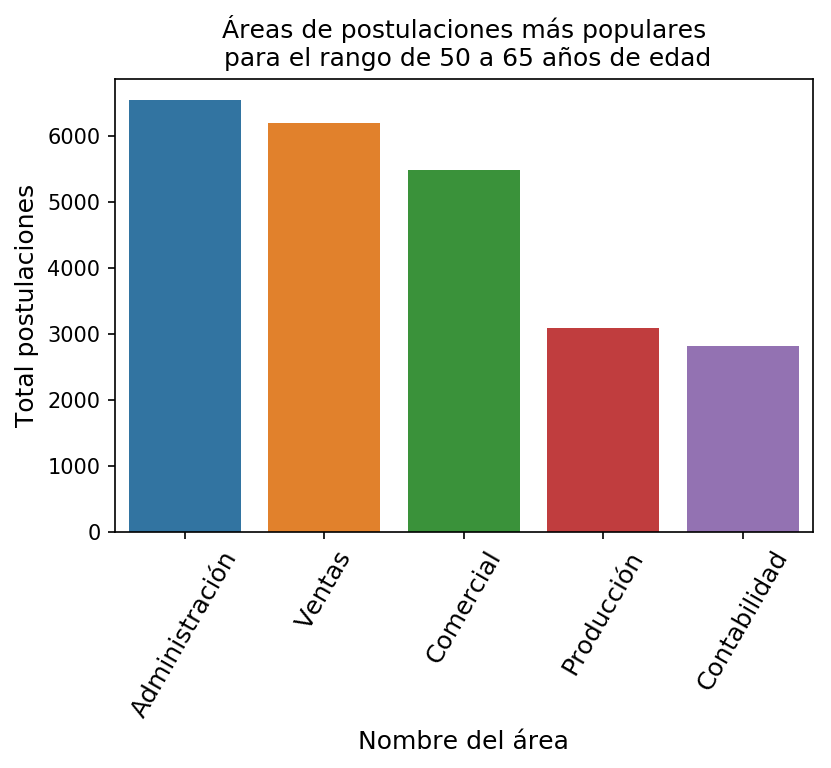

In [57]:
popus4 = sns.countplot(x='nombre_area', data=postulaciones_edad_50_a_65, order=postulaciones_edad_50_a_65['nombre_area'].value_counts().iloc[:5].index)
popus4.set_title("Áreas de postulaciones más populares\n para el rango de 50 a 65 años de edad")
popus4.set_xlabel("Nombre del área", fontsize = 12)
popus4.set_ylabel("Total postulaciones", fontsize = 12)
popus4.set_xticklabels(popus4.get_xticklabels(), rotation=60, fontsize=12)

In [58]:
#Ahora vamos a analizar que sucede con respecto a part time y full time y las edades.
#buscamos hacer un count plot y meterlos en el mismo grafico ya que son solo dos variables categoricas.
postulaciones_avisos = postulaciones_avisos[postulaciones_avisos['tipo_de_trabajo'].str.contains("time")]

Text(0.5,1,'Postulaciones para cada tipo de trabajo segun edad')

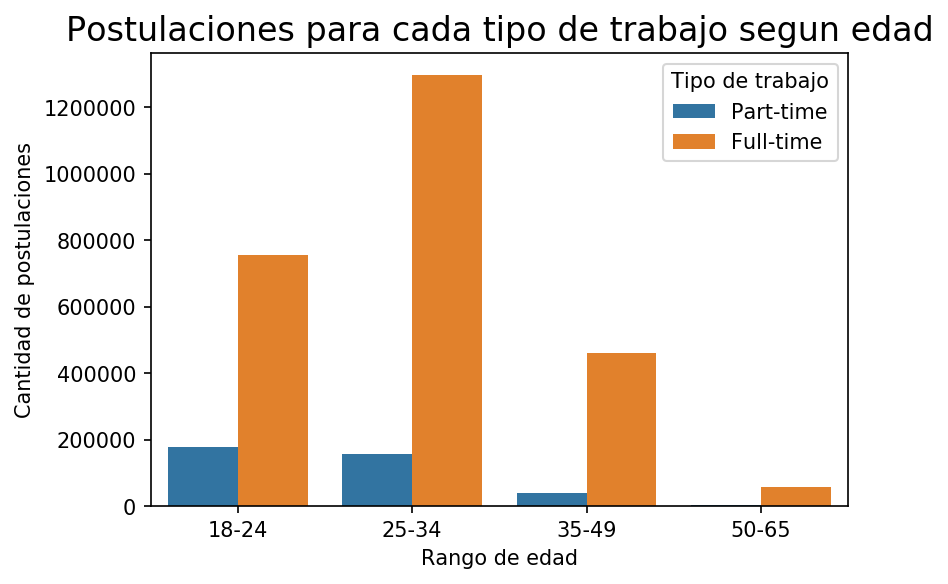

In [59]:
postulaciones_avisos.rename(columns={'tipo_de_trabajo': 'Tipo de trabajo'}, inplace=True)
tipo_de_trabajo_por_edades = sns.countplot(x="rango_edades", hue="Tipo de trabajo", data=postulaciones_avisos, order = ["18-24", "25-34", "35-49", "50-65"])
tipo_de_trabajo_por_edades.set_xlabel("Rango de edad")
tipo_de_trabajo_por_edades.set_ylabel("Cantidad de postulaciones")
tipo_de_trabajo_por_edades.set_title("Postulaciones para cada tipo de trabajo segun edad", fontsize = 16)